# **Capstone project: Providing data-driven suggestions for HR**

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [1]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns


from sklearn.model_selection import train_test_split, GridSearchCV
# import models 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier, plot_importance
#import metrics
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
# import pickle to save fitted models
import pickle
path = '/home/jovyan/work/'

### Load dataset


In [2]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
### YOUR CODE HERE ###
df0 = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
df0.head(10)


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [3]:
# Gather basic information about the data
df0.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [4]:
# Gather descriptive statistics about the data
df0.describe()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Data Cleaning

#### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [5]:
# Display all column names
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [6]:
# Rename columns as needed
df0 = df0.rename(columns={"average_montly_hours":"average_monthly_hours", 'time_spend_company':'tenure'})
cols = ['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary']
# Creating a dictionary for column names in the format: col_before:col_after for ease of use when renaming
renamed_cols = {col:col.lower() for col in cols}
# Rename columns in dataframe
df0 = df0.rename(columns=renamed_cols)
# Display all column names after the update
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [7]:
# Check for missing values
df0.isna().sum(axis=0)

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [8]:
# Check for duplicates
duplicates = df0.duplicated()
df0[duplicates]

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [9]:
# Inspect some rows containing duplicates as needed
df0[duplicates].head(10)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low
1516,0.40,0.50,2,127,3,0,1,0,IT,low
1616,0.37,0.46,2,156,3,0,1,0,sales,low
1696,0.39,0.56,2,160,3,0,1,0,sales,low
1833,0.10,0.85,6,266,4,0,1,0,sales,low
12000,0.38,0.53,2,157,3,0,1,0,sales,low


In [10]:
# Drop duplicates and save resulting dataframe in a new variable as needed
df1 = df0.drop_duplicates()


# Display first few rows of new dataframe as needed
df1.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Check outliers

Check for outliers in the data.

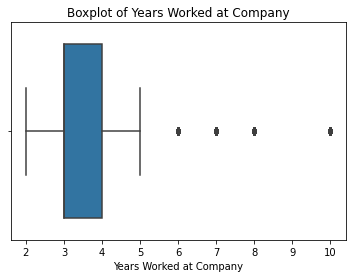

In [11]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers

boxplot = sns.boxplot(df1['tenure'])
boxplot.set_title("Boxplot of Years Worked at Company");
boxplot.set_xlabel("Years Worked at Company");
plt.show()

In [12]:
# Determine the number of rows containing outliers

# Outliers are any values larger than 5
tenure_outliers = df1[df1['tenure'] > 5]

print("There are {} rows containing outliers".format(len(tenure_outliers)))

There are 824 rows containing outliers


## Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [13]:
# Get numbers of people who left vs. stayed
print(df1['left'].value_counts())

# Get percentages of people who left vs. stayed
print(df1['left'].value_counts() / len(df1) * 100)


0    10000
1     1991
Name: left, dtype: int64
0    83.39588
1    16.60412
Name: left, dtype: float64


Out of the 11991 observations in the data, 10000 are currently working at the company and 1991 left the company.
- This leaves us with a class imbalance of about 83:16

### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

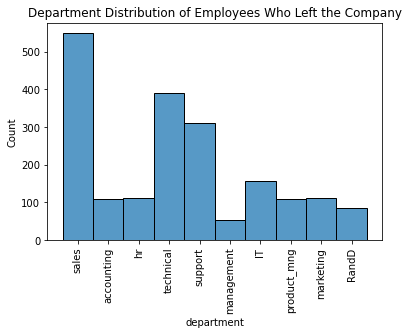

In [14]:
dept_left = df1[df1['left'] == 1][['department']]
plt.xticks(rotation=90)
dept_left_plot = sns.histplot(x = dept_left['department'])
plt.title("Department Distribution of Employees Who Left the Company")

plt.show()


Among employees who left the company, the most common departments are `sales`, `technical`, and `support`

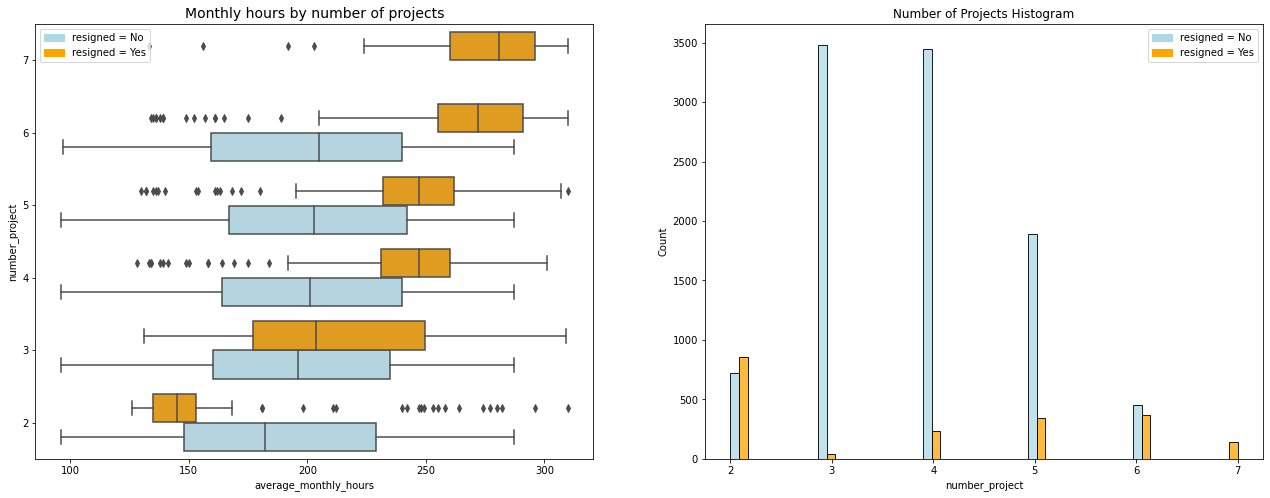

In [15]:
fig, ax = plt.subplots(1, 2, figsize = (22,8))

sns.boxplot(data=df1, x='average_monthly_hours',y='number_project', hue='left', orient='h',ax=ax[0], palette=['lightblue','orange'])
ax[0].invert_yaxis()
ax[0].set_title('Monthly hours by number of projects', fontsize='14');

sns.histplot(data=df1, x='number_project',hue='left', ax=ax[1], multiple='dodge', palette=['lightblue','orange'])
ax[1].set_title("Number of Projects Histogram")

top_bar = mpatches.Patch(color='lightblue',label='resigned = No')
bottom_bar = mpatches.Patch(color='orange', label='resigned = Yes')
ax[0].legend(handles=[top_bar, bottom_bar])
ax[1].legend(handles=[top_bar, bottom_bar])

plt.show()


As one takes on more projects, it's expected that they are working more hours. However it appears that the people that left are either:
- working less than their peers (these were likely fired)
- working significantly more than their peers 

Every employee who had left with 4 projects and above worked over 250 hours a month. These employees were significantly overworked and their satisfaction was lower as a result. This group of employees appear to have been heavily contributing to their projects and may have left the company due to their working significantly more than their peers.

Every employee who had 7 projects left, this signifies that the company is overworking its' employees and should consider methods to reduce the workload for their employees. Around 3-4 projects we have a smaller turnover. 

In [16]:
df1[df1['number_project'] == 7]['left'].value_counts()

1    145
Name: left, dtype: int64

This shows that all employees who had 7 projects left the company.

In [17]:
# Sorting the employee satisfaction levels among those who left
df1[df1['left']==1]['satisfaction_level'].value_counts().sort_index().head()

0.09    110
0.10    203
0.11    188
0.12      2
0.13      1
Name: satisfaction_level, dtype: int64

In [18]:
val = (110 + 203 + 188)
total_left = df1[df1['left'] == 1].shape[0]
print("Approximately {:.3}% of employees who left had a satisfaction rating between 0.09 and 0.11".format(val/total_left * 100))


Approximately 25.2% of employees who left had a satisfaction rating between 0.09 and 0.11


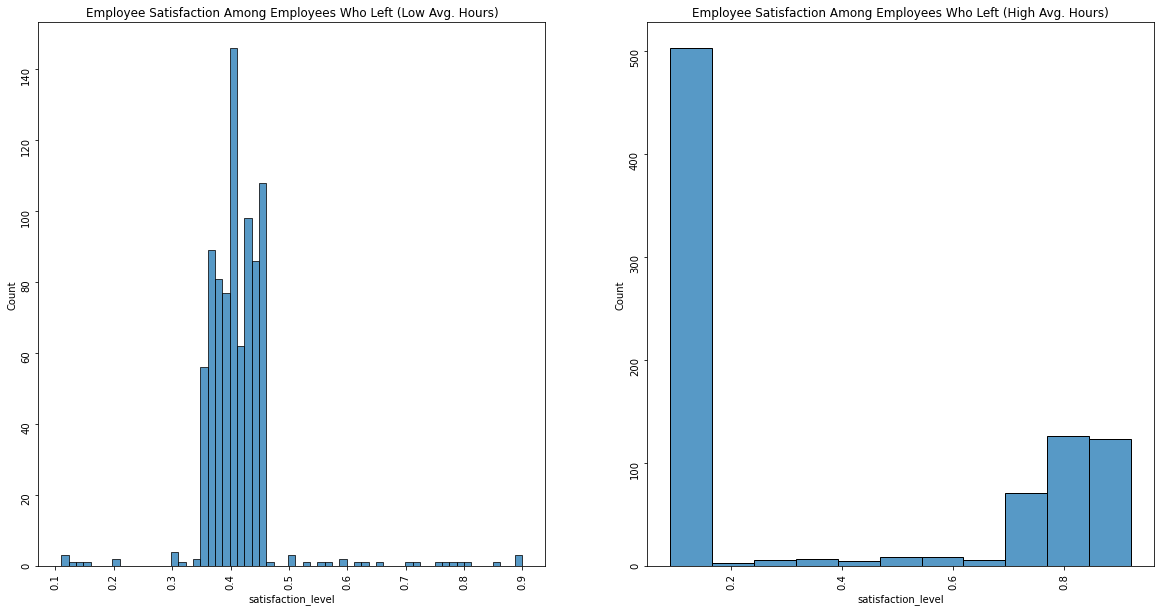

In [19]:
low_avg_hrs = df1[(df1['average_monthly_hours'] < 160) & (df1['left'] == 1)]
high_avg_hrs = df1[(df1['average_monthly_hours'] > 240) & (df1['left'] == 1)]

fig, axes = plt.subplots(1,2, figsize=(20,10))


salaries = ['Low',"High"]
for idx, salary in enumerate([low_avg_hrs, high_avg_hrs]):
    salary_hist = sns.histplot(salary, x='satisfaction_level', ax=axes[idx])
    axes[idx].tick_params(rotation=90)
    salary_hist.set_title("Employee Satisfaction Among Employees Who Left ({} Avg. Hours)".format(salaries[idx]))

It appears that a large majority of employees who are still employed with the company work between 130 hours and around 280 hours a month. Employees who worked for a high number of hours report an average satisfaction level of 0.38, while employees who worked for a low number of hours report and average satisfaction level of 0.41. The overworked employees reported significantly worse satisfaction. 

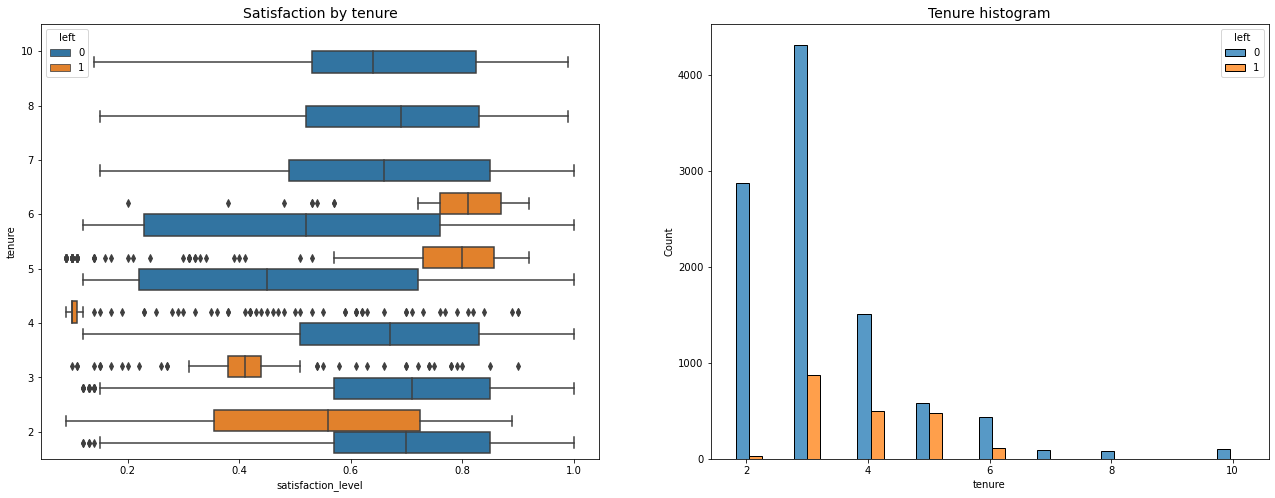

In [20]:

# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Create boxplot showing distributions of `satisfaction_level` by tenure, comparing employees who stayed versus those who left
sns.boxplot(data=df1, x='satisfaction_level', y='tenure', hue='left', orient="h", ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Satisfaction by tenure', fontsize='14')

# Create histogram showing distribution of `tenure`, comparing employees who stayed versus those who left
tenure_stay = df1[df1['left']==0]['tenure']
tenure_left = df1[df1['left']==1]['tenure']
sns.histplot(data=df1, x='tenure', hue='left', multiple='dodge', shrink=5, ax=ax[1])
ax[1].set_title('Tenure histogram', fontsize='14')

plt.show();

There appears to be 2 groups of employees: those who have a low tenure and are dissatisfied with the company and those who have a higher tenure with high satisfaction. 

- It appears that theres a group of dissatisfied employees at the 4-year mark. This may relate to changes in company policy that impacted these people.
- Employees who have stayed there the longest tend not to leave. Additionally their satisfaction levels are about the same as employees who have barely started working.
    - The histogram confirms that there are no employees with long tenure who have left the company. This may be due to them having a better paying role, which would coincide with their higher satisfaction levels.
    - The histogram also confirms that there are not too many employees with long tenure.

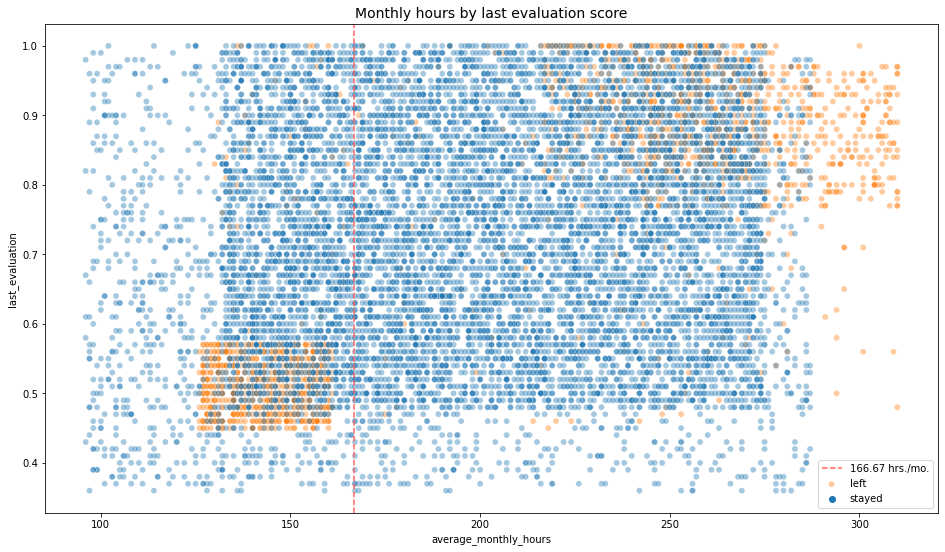

In [21]:
plt.figure(figsize=(16, 9))
sns.scatterplot(data=df1, x='average_monthly_hours', y='last_evaluation',hue='left',alpha=0.4)

plt.axvline(x=166.67, color='#ff6361', label='166.67 hrs./mo.', ls='--')
plt.legend(labels=['166.67 hrs./mo.', 'left', 'stayed'])
plt.title('Monthly hours by last evaluation score', fontsize='14');

From this scatterplot, it appears that there is a positive correlation between working more hours on average and a high evaluation score.
- It seems that overworked employees received high overall scores, while employees who worked less than 166.67 hours received a lower score.
- Working more doesn't necessarily guarantee a higher evaluation score
- It appears that more than half of the employees are working more than 166.67 hours on average

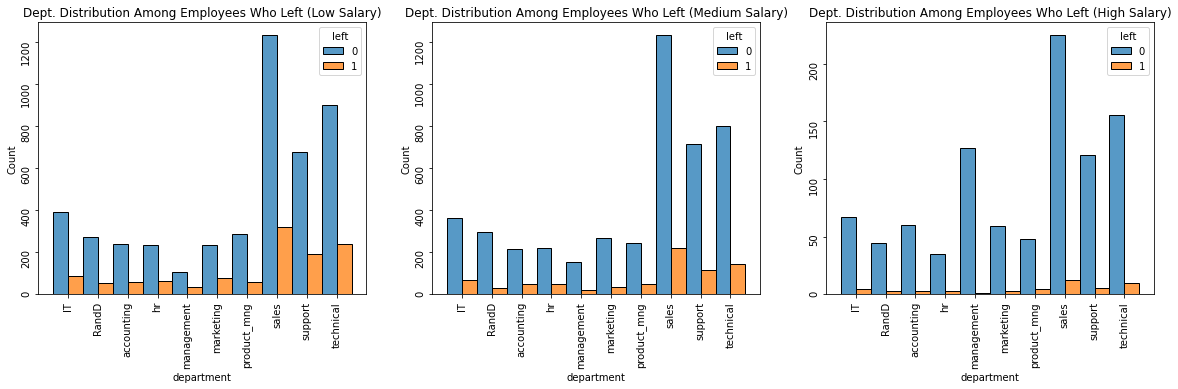

In [22]:
# 3 distributions of the departments employees resigned from divided by salary type
fig, axes = plt.subplots(1,3, figsize=(20,5))
plt.xticks(rotation=90);
low_salary = df1[df1['salary'] == 'low'].sort_values('department',ascending=True)
medium_salary = df1[df1['salary'] == 'medium'].sort_values('department',ascending=True)
high_salary = df1[df1['salary'] == 'high'].sort_values('department',ascending=True)
salaries = ['Low',"Medium","High"]
for idx, salary in enumerate([low_salary, medium_salary, high_salary]):
    salary_hist = sns.histplot(salary, x='department', ax=axes[idx], hue='left', multiple='dodge')
    axes[idx].tick_params(rotation=90)
    salary_hist.set_title("Dept. Distribution Among Employees Who Left ({} Salary)".format(salaries[idx]))
    

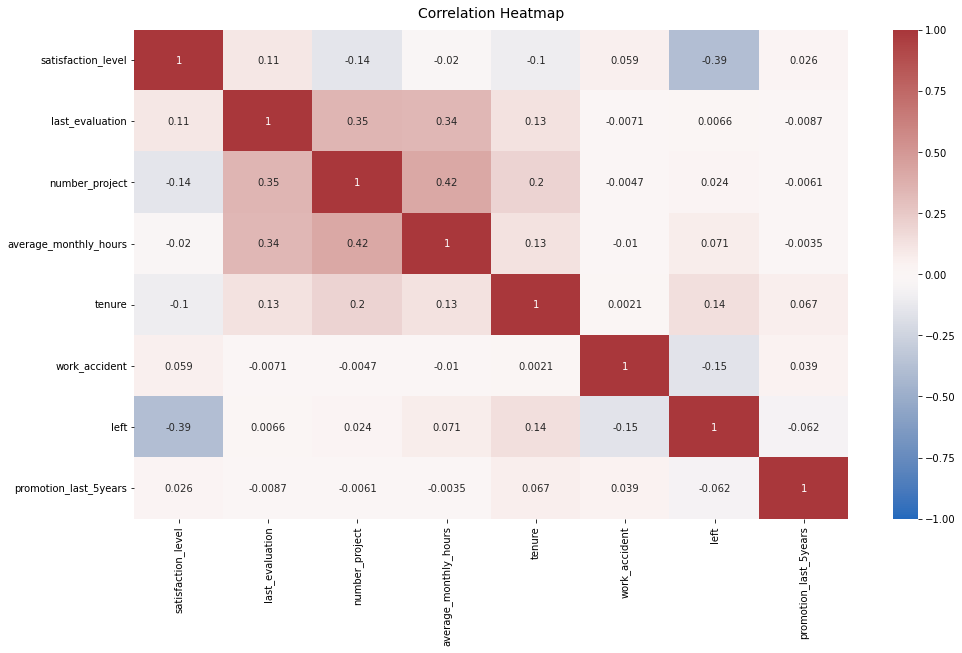

In [23]:
# Plot a correlation heatmap
plt.figure(figsize=(16, 9))
heatmap = sns.heatmap(df0.corr(), vmin=-1, vmax=1, annot=True, cmap=sns.color_palette("vlag", as_cmap=True))
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12);

This heatmap shows that there are positive correlations between number of projects, average monthly hours, and previous evaluation scores.

In [24]:
# Create dummy columns
df_encoded = df1.copy()

# Encode the `salary` column as an ordinal numeric category
df_encoded['salary'] = (
    df_encoded['salary'].astype('category')
    .cat.set_categories(['low', 'medium', 'high'])
    .cat.codes
)

# Dummy encode the `department` column
df_dummies = pd.get_dummies(df_encoded, drop_first=False)

# Display the new dataframe
df_dummies.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


I will be creating a new column `overworked`. It will be equal to 1 when the employee works more than 166.67 hours on average and 0 otherwise

In [25]:
# Creating 'overworked' column
df_dummies['overworked'] = df_dummies['average_monthly_hours'].apply(lambda x: 1 if x > 175 else 0)


### Insights

- Among employees who left the company, the most common departments are `sales`, `technical`, and `support`
- Approximately 25.2% of employees who left had a satisfaction rating between 0.09 and 0.11
- Employees who left the company had an average evaluation score of either 0.5 or 0.9.
    - It appears that these were either low performers who were fired or high performers who were dissatisfied with the company.
        - Employees who left and were low performers worked for the company for 3 years on average. 
        - Employees who left and were high performers worked for the company for 5 years on average. 
        - There appears to be an issue regarding why such high performers are leaving after 5 years.
- A large percentage of the employees who left the company reported having a low or medium salary.
    - The employees who reported having a low or medium salary most commonly resigned from the `sales`, `technical`, and `support` departments.
    - The employees who reported having a high salary most commonly resigned from the `sales`, `technical`, and `management` departments.
- Employees who left the company worked more hours on average.
    - Due to multiple projects, employees are incredibly overworked, which leads to lowered satisfaction and their leaving the company as a result. 
    - The distribution of hours worked shows that employees who left either worked around 150 hours/month or around 280 hours/month on average. 50 hours/week M-F is the same as 166 hours/month. 
        - Employees who worked closer to 150 hours/month had an average satisfaction level of 0.41
        - Employees who worked closer to 280 hours/month had an average satisfaction level of 0.38
        
- Most employees who left had 2 projects and the distribution of projects among those who left is relatively even, however:
    - All employees who had 7 projects left the company
    - Among these employees, the departments who had the most employees leave were the `sales`, `technical`, and `support` departments.


## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

This is a binary prediction task, attempting to predict whether an employee left(1) or did not leave(0)

I think the most appropriate models for this task would be a Decision Tree classifier, a Random Forest classifier, and an XGBoost Classifier

### Modeling


In [26]:
# Helper Functions
def conf_matrix_plot(model, X_data, y_data):
    '''
    Accepts as argument model object, X data (test or validation) and y data (test or validation)
    
    Return a plot of confusion matrix for predictions on y data
    '''
    model_pred = model.predict(X_data)
    cm = confusion_matrix(y_data, model_pred, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    
    disp.plot(values_format='') #Suppresses scientific notation
    plt.show()
    
def make_results(model_name:str, model_object, metric:str):
    '''
    Accepts as arguments a model name and a fit GridSearchCV model object.
    
    Returns a pandas df with the F1, recall, precision, and accuracy scores for the model with the best mean F1 score scross all validation folds.
    '''
    
    metric_dict = {'auc': 'mean_test_roc_auc',
                   'precision': 'mean_test_precision',
                   'recall': 'mean_test_recall',
                   'f1': 'mean_test_f1',
                   'accuracy': 'mean_test_accuracy'
                  }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract Accuracy, precision, recall, and f1 score from that row
    auc = best_estimator_results.mean_test_roc_auc
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
    
    # Create table of results
    table = pd.DataFrame({'Model':[model_name],
                          'F1':[f1],
                          'Accuracy':[accuracy],
                          'Precision':[precision],
                          'Recall':[recall],
                          'AUC':[auc]})
    return table



## Model Creation and Evaluation

- I will be creating 3 models: DecisionTreeClassifier, RandomForestClassifier, and XGBoostClassifier
- I will create a training, validation, and test set. 
- I will evaluate each of the model's performance on the validation set, using F1 score as the key performance metric.
- Once I have evaluated all models, the champion model will be the one with the highest F1 score. 
- I will create a confusion matrix for each model to display another perspective of the model's performance.
- I will only use the champion model to make predictions on the test data.
    - From here we will be able to determine what the strongest features are in our model.

In [27]:
# Create Training Data 
y = df_dummies['left']
X = df_dummies.drop(['left',],axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

In [28]:
# Create Decision Tree Classifier
decision_tree = DecisionTreeClassifier(random_state=0)

decision_tree.fit(X_tr, y_tr)

dt_pred = decision_tree.predict(X_val)

dt_accuracy = accuracy_score(y_val, dt_pred)
dt_precision = precision_score(y_val, dt_pred)
dt_recall = recall_score(y_val, dt_pred)
dt_f1 = f1_score(y_val, dt_pred)
dt_auc = roc_auc_score(y_val, dt_pred)

# Create Main Results Table
results_table = pd.DataFrame({'Model':["Decision Tree"],
                          'F1':[dt_f1],
                          'Accuracy':[dt_accuracy],
                          'Precision':[dt_precision],
                          'Recall':[dt_recall],
                            'AUC': [dt_auc]})
results_table

,Model,F1,Accuracy,Precision,Recall,AUC
0,Decision Tree,0.909091,0.970654,0.894309,0.92437,0.951878


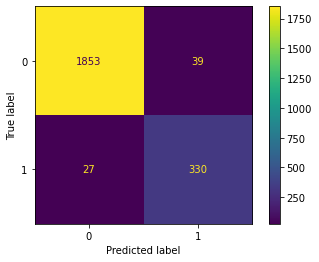

In [29]:
# Confusion Matrix for Decision Tree Classifier
conf_matrix_plot(decision_tree, X_val, y_val)

In [30]:
# Create Random Forest Classifier
rf = RandomForestClassifier(random_state=0)
# scoring metrics
scoring = ['precision','recall','accuracy','f1','roc_auc']
# list of hyperparameters
cv_params = {'n_estimators' : [50,100], 
              'max_depth' : [10,50],        
              'min_samples_leaf' : [0.5,1], 
              'min_samples_split' : [0.001, 0.01],
              'max_features' : ["sqrt","log"], 
              'max_samples' : [.5,.9]}
rf_cv = GridSearchCV(rf, cv_params, cv=5, scoring=scoring, refit='roc_auc',n_jobs=-1)

In [31]:
# Fit the model
rf_cv.fit(X_tr, y_tr)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,...
                                              verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [32]:
# Save pickled model and read it in 
with open(path+'rf_cv_model.pickle','wb') as to_write:
    pickle.dump(rf_cv, to_write)


In [33]:
with open(path+'rf_cv_model.pickle','rb') as to_read:
    rf_cv = pickle.load(to_read)

In [34]:
# Get Optimal Parameters
rf_cv.best_params_

{'max_depth': 10,
 'max_features': 'sqrt',
 'max_samples': 0.9,
 'min_samples_leaf': 1,
 'min_samples_split': 0.001,
 'n_estimators': 50}

In [35]:
y_pred = rf_cv.predict(X_test)

rf_table = make_results('Random Forest', rf_cv, 'auc')
results_table = pd.concat([results_table,rf_table])
results_table

,Model,F1,Accuracy,Precision,Recall,AUC
0,Decision Tree,0.909091,0.970654,0.894309,0.92437,0.951878
0,Random Forest,0.945062,0.982207,0.983826,0.90941,0.980091


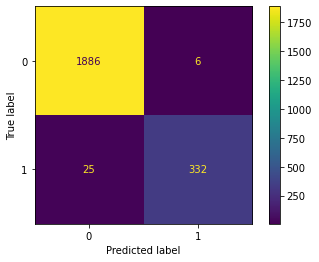

In [36]:
# Confusion matrix for Random Forest
conf_matrix_plot(rf_cv, X_val, y_val)

In [37]:
# XGBoost Classifier
xgb = XGBClassifier(objective='binary:logistic', random_state=0)
xgb_cv_params = {'max_depth': [4, 6],
              'min_child_weight': [3, 5],
              'learning_rate': [0.1, 0.2, 0.3],
              'n_estimators': [5,10,15],
              'subsample': [0.7],
              'colsample_bytree': [0.7]
              }
xgb_cv = GridSearchCV(xgb, xgb_cv_params, scoring=scoring, cv=5, refit='roc_auc', n_jobs=-1)

In [38]:
xgb_cv.fit(X_tr, y_tr)

GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max...
                                     predictor=None, random_state=0,
                                     reg_alpha=None, ...),
             iid='deprecated', n_jobs=-1,
             param_grid={'colsample_bytree': [0.7],
                         'learning_rate': [0.1, 0.2, 0.3], 'm

In [39]:
# Save pickled model and read it in 
with open(path+'xgb_cv_model.pickle','wb') as to_write:
    pickle.dump(xgb_cv, to_write)

In [40]:
with open(path+'xgb_cv_model.pickle','rb') as to_read:
    xgb_cv = pickle.load(to_read)

In [41]:
# Get Optimal Parameters
xgb_cv.best_params_

{'colsample_bytree': 0.7,
 'learning_rate': 0.3,
 'max_depth': 4,
 'min_child_weight': 5,
 'n_estimators': 15,
 'subsample': 0.7}

In [42]:
y_pred = xgb_cv.predict(X_val)

xgb_table = make_results('XG Boost', xgb_cv, 'auc')
results_table = pd.concat([results_table,xgb_table])
results_table

,Model,F1,Accuracy,Precision,Recall,AUC
0,Decision Tree,0.909091,0.970654,0.894309,0.924370,0.951878
0,Random Forest,0.945062,0.982207,0.983826,0.909410,0.980091
0,XG Boost,0.935609,0.978945,0.964689,0.908528,0.980001


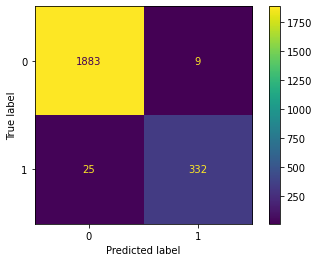

In [43]:
# Confusion matrix for XG Boost
conf_matrix_plot(xgb_cv, X_val, y_val)

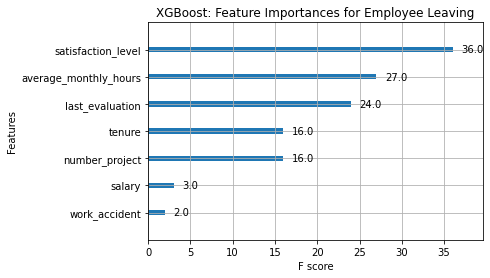

In [51]:
plot_importance(xgb_cv.best_estimator_,title="XGBoost: Feature Importances for Employee Leaving")

In [45]:
results_table.sort_values(by='F1', ascending=False)

,Model,F1,Accuracy,Precision,Recall,AUC
0,Random Forest,0.945062,0.982207,0.983826,0.909410,0.980091
0,XG Boost,0.935609,0.978945,0.964689,0.908528,0.980001
0,Decision Tree,0.909091,0.970654,0.894309,0.924370,0.951878


In [46]:
y_pred_test = rf_cv.predict(X_test)
champion_precision = precision_score(y_test, y_pred_test)
champion_recall = recall_score(y_test, y_pred_test)
champion_accuracy = accuracy_score(y_test, y_pred_test)
champion_f1 = f1_score(y_test, y_pred_test)
champion_auc = roc_auc_score(y_test, y_pred_test)

# Create Main Results Table
champ_table = pd.DataFrame({'Model':["Random Forest"],
                          'F1':[champion_f1],
                          'Accuracy':[champion_accuracy],
                          'Precision':[champion_precision],
                          'Recall':[champion_recall],'AUC':[champion_auc]})
champ_table

,Model,F1,Accuracy,Precision,Recall,AUC
0,Random Forest,0.936126,0.979653,0.975983,0.899396,0.947499


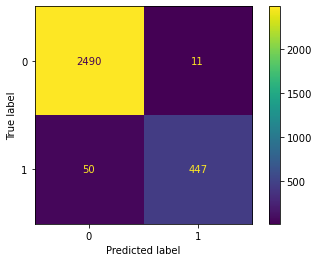

In [47]:
# Confusion Matrix for Champion Model
conf_matrix_plot(rf_cv, X_test, y_test)

In [48]:
importances = rf_cv.best_estimator_.feature_importances_
feature_names = X.columns
feature_imp_df = pd.DataFrame({'Feature': feature_names, 'Gini Importance': importances}).sort_values('Gini Importance', ascending=False) 

- Key Insights:
    - The model had a Precision score of 0.978
    - The model had a Recall score of 0.899
    - The model had an Accuracy score of 0.979
    - The model had an F1-score of 0.937
    - The model had an AUC of 0.947
- Business Recommendations: The success of the Random Forest model suggests that the company should invest more into model building since this model is very good at predicting employee turnover.
- Company Recommendations: The company should look into improving how projects are distributed and how many hours employees work a month. This ties into employee satisfaction, the strongest predictor of turnover.
    - The company needs to look into the `Sales`, `Technical`, and `Support` departments, as they see the highest rates of turnover at practically every salary level.
    - The company should consider promoting those employees with a 4+ year tenure, if not promoted even the most satisfied employees will leave.
    
- I believe if there was more data available I could improve this model. 
    - I also think if I were to combine different base learners in the XG Boost model (e.g. Logistic Regression model) I believe the overall predictive power would be stronger.
- No ethical considerations at this stage.

## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

My champion model was a Random Forest Classifier. It performed exceptionally well in predicting whether an employee will leave or not. It outperformed a Decision Tree model and an XG Boost model.

Specifically:
- The model had an AUC score of 0.947
    - This metric was used to determine our champion model.
- The model had a Precision score of 0.978
    - Out of the employees the model predicted to leave, 97.8% actually left.
- The model had a Recall score of 0.899
    - Out of all the employees who truly left, 83.7% were identified as left by the model.
- The model had an Accuracy score of 0.979
    - 96% of the data points were correctly classified.
- The model had an F1-score of 0.947
    - This model represents the harmonic mean, or trade off, between precision and recall. 
    
The 5 most important features in making predictions are:
- satisfaction level
- number of projects
- tenure
- average monthly hours worked
- last evaluation score
  

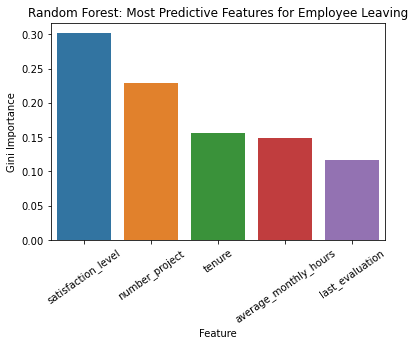

In [49]:
best_features = sns.barplot(data=feature_imp_df.head(), x='Feature',y='Gini Importance')
best_features.set_title("Random Forest: Most Predictive Features for Employee Leaving")
plt.xticks(rotation=35)
plt.show()

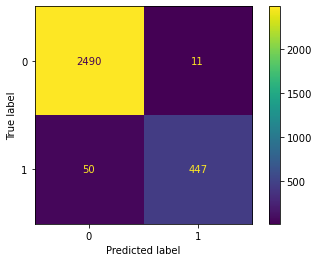

In [50]:
# Confusion Matrix for Champion Model
conf_matrix_plot(rf_cv, X_test, y_test)

The champion model predicts employees who leave pretty well, however it does leave us with more false negatives than false positives. This means that the model will at times predict that an employee will not leave when they in fact will.

### Conclusion, Recommendations, Next Steps

In conclusion:
- The Random Forest model accurately predicted if an employee will leave the company 97.9% of the time.
- Employee turnover is strongly linked to satisfaction level, number of projects, average monthly hours worked, and last evaluation score. 

Recommendations: 
- The company should look into improving how projects are distributed and how many hours employees work a month. This may improve employee satisfaction levels, potentially reducing employee turnover as satisfaction is the strongest predictor of turnover. 
    - The company should aim to give employees 3-4 project max, anything else results in an overworked employee.
    - The company should reward employees for working longer hours or not require them to do so at all.

Next Steps:
- The success of the Random Forest model suggests that the company should invest more into model building since this model is very good at predicting employee turnover.